# Task 1: Preliminary Setup and Model Loading (15 Marks Total)

### T1.1 Environment Setup (3 Marks): Configure the development environment (e.g., Google Colab) with all necessary libraries for text-to-video generation using diffusion models.

In [1]:
# Task 1: Preliminary Setup and Model Loading
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
# Task 1: Preliminary Setup and Model Loading
!pip install transformers diffusers accelerate imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.8 MB/s eta 0:00:00


In [10]:
!pip install pillow matplotlib

In [3]:
# Task 1: Preliminary Setup and Model Loading

import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline, DDIMScheduler
import imageio

### T1.2 Model Loading (5 Marks): Load a pre-trained diffusion model (e.g., Stable Diffusion) and ensure compatibility with GPU acceleration.

In [4]:
# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda




### T1.3 Scheduler Configuration (3 Marks): Configure the diffusion scheduler to optimize video frame generation.

In [5]:
# Load model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16
)
pipe = pipe.to(device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated 

### T1.4 Configure scheduler(4 Marks): Define and test simple prompts to generate individual frames.

In [6]:
# Configure scheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

# Task 2: Frame Generation and Post-Processing (20 Marks Total)

### T2.1 Prompt Engineering for Frame Variability (10 Marks): Design prompts to ensure smooth transitions and variability across frames.

In [7]:

prompt = "A beautiful landscape with mountains during sunset"
num_frames = 16
frames = []

### T2.2 Frame Generation (10 Marks): Generate a sequence of frames (e.g., 16 frames) based on the prompts

In [8]:
for i in range(num_frames):
    frame = pipe(prompt, num_inference_steps=50).images[0]
    frames.append(frame)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

# Task 3: Create a GIF from the generated frames (10 Marks Total)

In [9]:
import imageio

# Create a GIF from the generated frames
imageio.mimsave("mountain_generated_video.gif", frames, fps=4)

# TAsk 4 : Display Video (10 marks )

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
# Open the GIF file
gif = Image.open('/content/mountain_generated_video.gif')

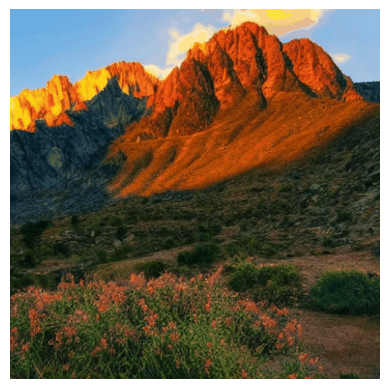

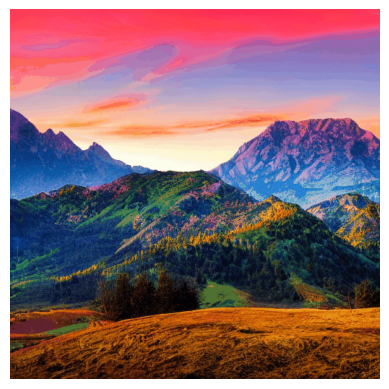

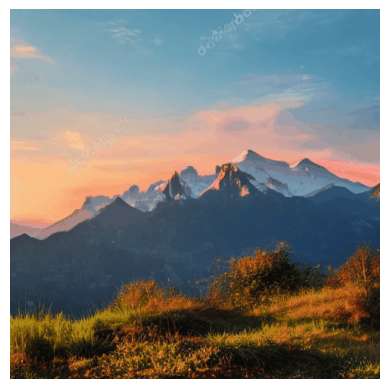

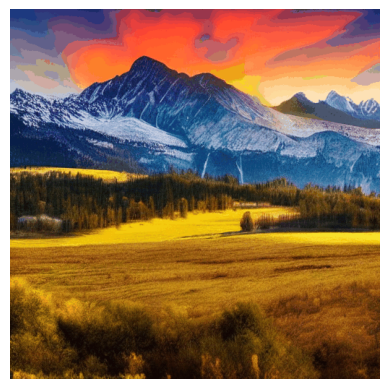

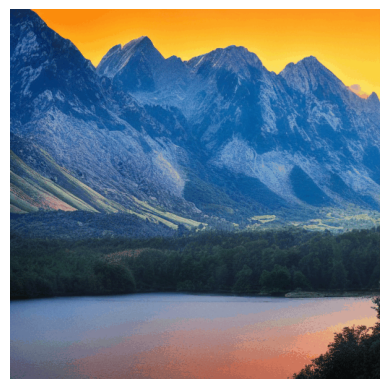

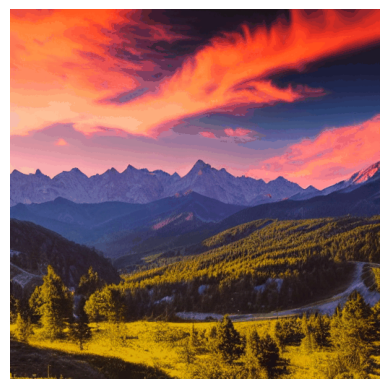

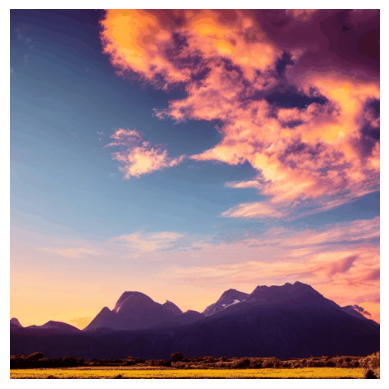

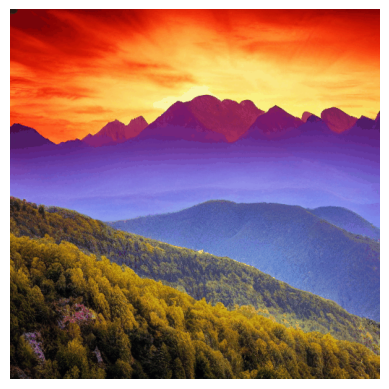

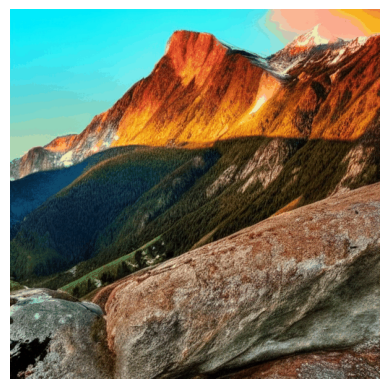

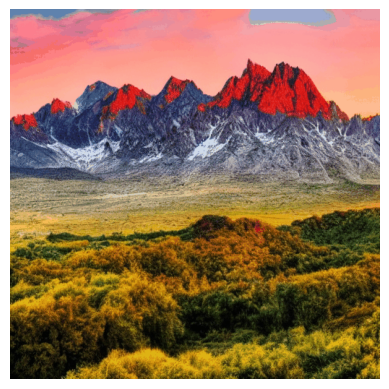

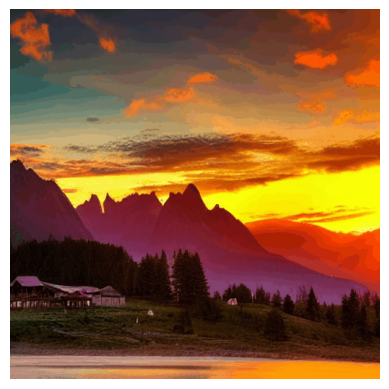

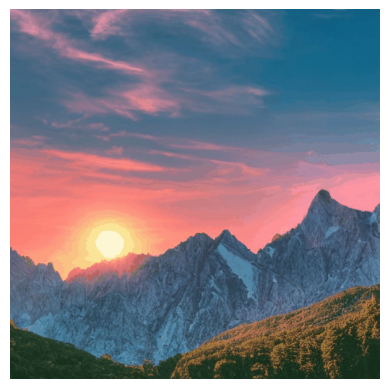

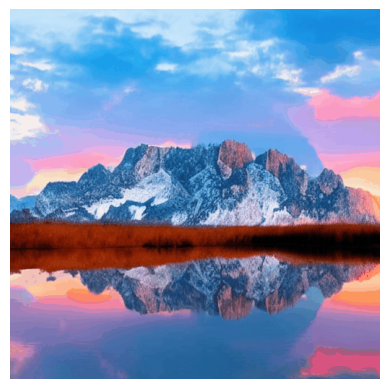

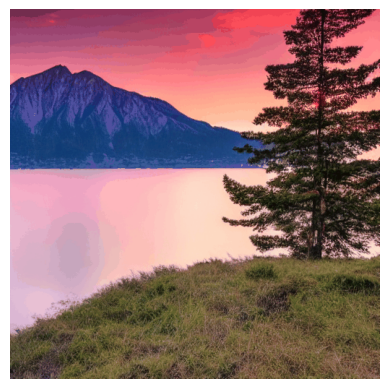

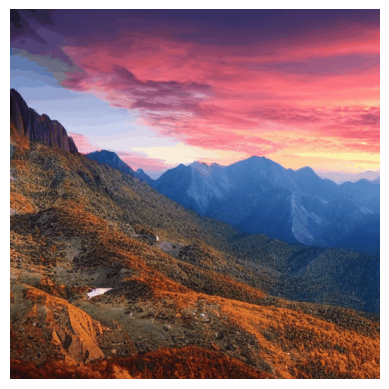

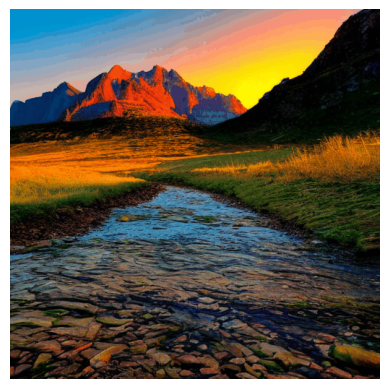

In [13]:
# Loop through each frame in the GIF
for frame in range(gif.n_frames):
    gif.seek(frame)  # Move to the current frame
    plt.imshow(gif)
    plt.axis('off')  # Hide axes
    plt.show()